## Imports

In [1]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

In [2]:
dir_files = '../Dataset/'
col_labels = [
    'Dev_ID',
    'Acc_X',
    'Acc_Y',
    'Acc_Z',
    'Gyr_X',
    'Gyr_Y',
    'Gyr_Z',
    'Mag_X',
    'Mag_Y',
    'Mag_Z',
    'Timestamp',
    'Act_Label'
]

act_labels = [
    'Stand',
    'Sit',
    'Sit and Talk',
    'Walk',
    'Walk and Talk',
    'Climb Stairs (CS)',
    'CS and Talk',
    'Stand to Sit',
    'Sit to Stand',
    'Stand to Sit and Talk',
    'Sit to Stand and Talk',
    'Stand to Walk',
    'Walk to Stand',
    'Stand to CS/CS and Talk',
    'CS to Walk',
    'CS and Talk to Walk and Talk'
]

modules_labels = [
    'N_Total',
    'Acc_N_Out',
    'Acc_Dens',
    'Gyr_N_Out',
    'Gyr_Dens',
    'Mag_N_Out',
    'Mag_Dens',
]

k_values = [
    3,
    3.5,
    4
]

## Read Files

In [3]:
def read_file(id=0, dev=2):
    file_path = dir_files + 'part' + str(id) + '/part' + str(id) + 'dev' + str(dev) + '.csv'

    csv_file = open(file_path)
    csv_reader = csv.reader(csv_file, delimiter=',')
    data_np = np.array(list(csv_reader)).astype(float)

    data = pd.DataFrame(data_np)
    data.columns = col_labels
    
    return [data,data_np]
    

[data,data_np] = read_file()
data

,Dev_ID,Acc_X,Acc_Y,Acc_Z,Gyr_X,Gyr_Y,Gyr_Z,Mag_X,Mag_Y,Mag_Z,Timestamp,Act_Label
0,2.0,3.0317,9.0450,3.1739,0.762470,3.70710,-0.313840,0.57764,0.68849,1.26540,63.629,1.0
1,2.0,2.9591,9.0436,3.1400,0.405880,4.66820,-0.101480,0.58385,0.68849,1.27410,83.160,1.0
2,2.0,2.9465,9.0545,3.0799,0.242300,5.52250,0.348570,0.56522,0.67857,1.26750,102.690,1.0
3,2.0,2.7898,9.0528,3.0726,0.498580,6.34630,0.611270,0.56108,0.65476,1.26100,122.220,1.0
4,2.0,2.6924,9.0377,2.9794,0.631970,6.69720,1.005600,0.57764,0.69246,1.26750,141.750,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
52859,2.0,2.3837,9.0681,3.4339,-0.429610,-1.75440,-0.300480,0.35197,0.88294,0.69737,1039200.000,1.0
52860,2.0,2.4075,8.9945,3.3985,-0.279800,-1.72390,0.129850,0.35197,0.86706,0.69079,1039200.000,1.0
52861,2.0,2.3837,9.0316,3.4346,-0.043147,-0.77803,0.195980,0.32919,0.84722,0.69956,1039300.000,1.0
52862,2.0,2.3236,9.0922,3.4472,-0.125830,-0.56445,-0.016121,0.33747,0.88889,0.70614,1039300.000,1.0


## Outliers Density

In [4]:
def calc_mod(data, n_act=16):
    acc = list()
    gyr = list()
    mag = list()

    for act in range(1, n_act+1):
        activity = data.loc[data['Act_Label'] == act]

        df_acc = pd.DataFrame(np.sqrt((activity['Acc_X']**2 + activity['Acc_Y']**2 + activity['Acc_Z']**2)))
        df_acc.columns=[act]
        acc.append(df_acc)

        df_gyr = pd.DataFrame(np.sqrt((activity['Gyr_X']**2 + activity['Gyr_Y']**2 + activity['Gyr_Z']**2)))
        df_gyr.columns=[act]
        gyr.append(df_gyr)

        df_mag = pd.DataFrame(np.sqrt((activity['Mag_X']**2 + activity['Mag_Y']**2 + activity['Mag_Z']**2)))
        df_mag.columns=[act]
        mag.append(df_mag)
    
    acc = pd.concat(acc)
    gyr = pd.concat(gyr)
    mag = pd.concat(mag)

    return [acc,gyr,mag]

[acc,gyr,mag] = calc_mod(data)

## Density

In [5]:
def getDensity(data,i):
    k=1.5
    quart = data[i].quantile([0.25,0.75])
    iqr = quart[0.75] - quart[0.25]
    lim = [quart[0.25] - k*iqr, quart[0.75] + k*iqr]

    values = data.loc[(data[i] < lim[0]) | (data[i] > lim[1]),[i]]
    n = data[pd.notnull(data[i])]

    return [values.shape[0] / n.shape[0] * 100, n.shape[0], values.shape[0]]  #densidade, nº de pontos, nº de outliers

In [6]:
def plotBoxplot(data,acts,title):
    plt.figure(figsize=(3*len(acts),10))

    for i in range(1,len(acts)+1):
        plt.subplot(1,len(acts),i)
        data[acts[i-1]].plot.box()
        plt.title(title + ' act=' + str(acts[i-1]))
    
    plt.show()

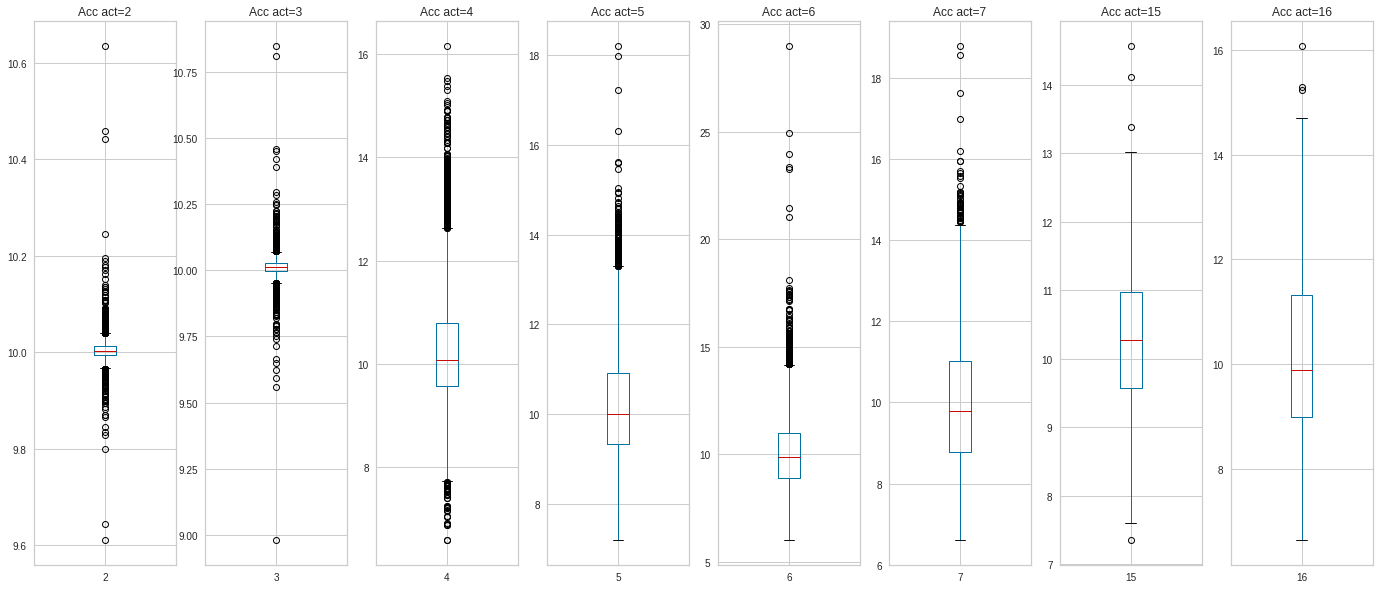

,labels,N_Total,Acc_N_Out,Acc_Dens,Gyr_N_Out,Gyr_Dens,Mag_N_Out,Mag_Dens
1,Stand,11012,762,6.919724,902,8.191064,12,0.108972
2,Sit,5760,201,3.489583,368,6.388889,0,0.000000
3,Sit and Talk,5760,357,6.197917,324,5.625000,45,0.781250
4,Walk,8706,363,4.169538,26,0.298645,106,1.217551
5,Walk and Talk,9474,192,2.026599,117,1.234959,12,0.126662
6,Climb Stairs (CS),6529,209,3.201103,76,1.164037,0,0.000000
7,CS and Talk,2817,50,1.774938,45,1.597444,0,0.000000
8,Stand to Sit,384,116,30.208333,51,13.281250,55,14.322917
9,Sit to Stand,384,63,16.406250,63,16.406250,43,11.197917
10,Stand to Sit and Talk,384,99,25.781250,70,18.229167,69,17.968750


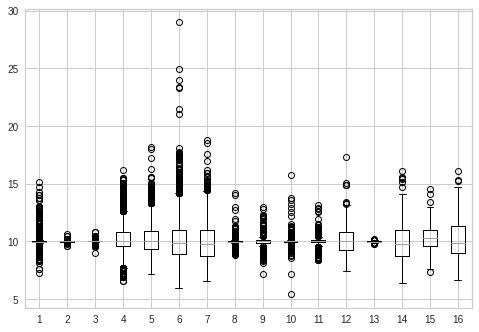

In [7]:
def evaluateDensity(acc,gyr,mag,n_act=16):
    density = [act_labels,[],[],[],[],[],[],[]]

    for i in range(1,n_act+1):
        [dens_acc,n_acc,n_out_acc] = getDensity(acc, i)
        density[1].append(n_acc)
        density[2].append(n_out_acc)
        density[3].append(dens_acc)

        [dens_gyr,n_gyr,n_out_gyr] = getDensity(gyr, i)
        density[4].append(n_out_gyr)
        density[5].append(dens_gyr)

        [dens_mag,n_mag,n_out_mag] = getDensity(mag, i)
        density[6].append(n_out_mag)
        density[7].append(dens_mag)
    
    density[0] = pd.DataFrame(density[0])
    density[0].columns = ['labels']

    for i in range(1,len(density)):
        density[i] = pd.DataFrame(density[i])
        density[i].columns = [modules_labels[i-1]]
    
    density = pd.concat(density,axis=1)

    acts = [
        # 1,
        2,
        3,
        4,
        5,
        6,
        7,
        # 8,
        # 9,
        # 10,
        # 11,
        # 12,
        # 13,
        # 14,
        15,
        16,
    ]

    plotBoxplot(acc,acts,'Acc')

    acc.boxplot()
    
    # plotBoxplot(gyr,acts,'Gyr')
    
    # plotBoxplot(mag,acts,'Mag')
    
    return density
    
density = evaluateDensity(acc,gyr,mag)
density['labels'] = act_labels
density.index = density.index + 1
display(density)

### 3.2.
<p> As atividades 8 a 11 consistem alternar entre estar em pé e sentado, ou vice-versa, enquanto o indivíduo realiza outras atividades (falar). A densidade de outliers nestes casos é muito alto. Isto pode dever-se a 2 coisas: 

<ul>
<li> O indivíduo pode ter-se movimentado mais rápido nuns momentos do que noutros, gerando uma grande variedade nos valores. 
<li> Como há menos momentos destas atividades (como podemos observar na tabela na columa 'Acc_n'), e dada a situação anterior, os momentos que se tornam outliers tornam-se demasiados em comparação com o número de momentos da atividade em causa.
<ul>

<p> As atividades semelhantes, como <em>Climb Stairs to Walk</em> e <em>Climb Stairs and Talk to Walk and Talk</em> têm densidades semelhantes. Conclui-se, assim, que adicionar a atividade <em>Talk</em> não modifica de forma significativa o número de outliers. Tal acontece também nas outras atividades que apenas é adicionado o <em>Talk</em>, a diferença da densidade de outliers é pequena.

<p> Na atividade <em>Sit</em> (atividade 2) e <em>Sit and Talk</em>, o intervalo de valores é pequeno pois, quando uma pessoa está sentada, não se movimenta pelo que a aceleração no eixo <em>xx'</em> e <em>yy'</em> é perto de 0.

<p> Nas atividades <em>Climb</em> e <em>Climb and Talk</em>, o intervalo de valores é alto pois o indivíduo tem, geralmente, uma aceleração inconstante quando sobe ou desce escadas, gerando os outliers. A densidade é baixa mas quando é gerado um outlier, este tem um valor muito longe da média.

## Z-Score

In [8]:
def plotZscore(acts,vector,vec_name):
    for act in acts:
        plt.figure(figsize=(3*(len(k_values)+1),10))

        for i in range(len(k_values)):
            k = k_values[i]

            [out_pos,not_out_pos] = zscore(vector[act],k)
            out = vector.loc[out_pos,]
            not_out = vector.loc[not_out_pos,]   

            plt.subplot(1,len(k_values)+1,i+1)
            plt.scatter(np.full((1,out.shape[0]),act),out[act],s=10,c='red',label='Outliers')
            plt.scatter(np.full((1,not_out.shape[0]),act),not_out[act],s=10,c='blue',label='Not Outliers')
            plt.title(vec_name + ' act=' + str(act) + ' k=' + str(k))
            plt.legend()

        plt.subplot(1,len(k_values)+1,len(k_values)+1)
        vector[act].plot.box(sym='r.')
        plt.title(vec_name + ' act=' + str(act))
        
        plt.show()    

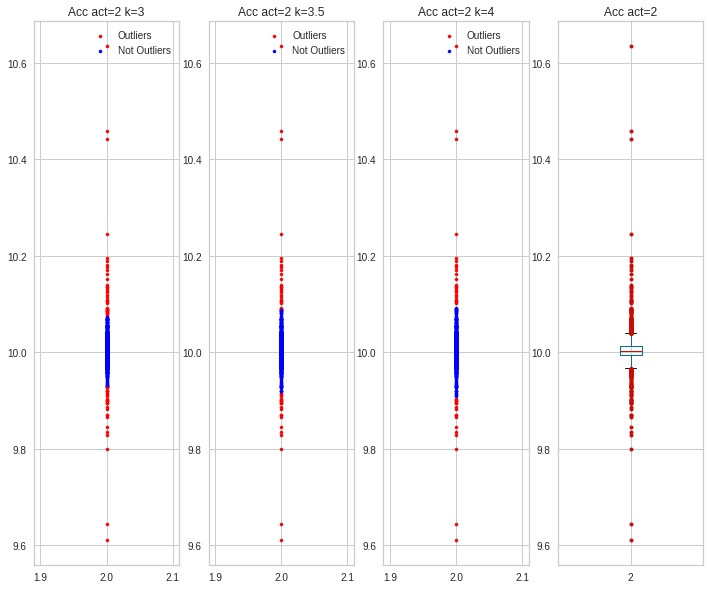

,labels,N_Total,Acc_N_Out,Z-score k=3,Z-score k=3.5,Z-score k=4,N_out_kmeans,N_clusters
1,Stand,11012,762,128,109,98,None,None
2,Sit,5760,201,71,52,43,None,None
3,Sit and Talk,5760,357,76,59,47,None,None
4,Walk,8706,363,105,38,19,None,None
5,Walk and Talk,9474,192,49,13,7,None,None
6,Climb Stairs (CS),6529,209,39,24,12,None,None
7,CS and Talk,2817,50,11,4,3,None,None
8,Stand to Sit,384,116,6,6,4,None,None
9,Sit to Stand,384,63,12,9,3,None,None
10,Stand to Sit and Talk,384,99,9,9,7,None,None


In [9]:
def zscore(vector,k):
    z = (vector - vector.mean()) / vector.std()
    
    out = z.loc[(z < -k) | (z > k)]
    not_out = z.loc[(z >= -k) & (z <= k)]

    return [out.index,not_out.index]

def outliersZscore(density,vector,vec_name,acts=[1],n_act=16):
    n_outliers = list() 
        
    for act in range(1,n_act+1):
        k_out = list()
        for i in range(len(k_values)):
            k=k_values[i]
            [out_pos,not_out_pos] = zscore(vector[act],k)

            k_out.append(out_pos.shape[0])

            out = vector.loc[out_pos,]
            not_out = vector.loc[not_out_pos,]   

        df = pd.DataFrame(k_out)
        df.columns = [act]
        df.index = k_values
        n_outliers.append(df)

    n_outliers = pd.concat(n_outliers,axis=1)
    n_outliers = n_outliers.transpose()

    data_zscore = pd.concat([density[['labels','N_Total','Acc_N_Out']],n_outliers],axis=1)

    for k in k_values:
        data_zscore = data_zscore.rename(columns={k: 'Z-score k=' + str(k)})

    plotZscore(acts,vector,vec_name)

    data_zscore['N_out_kmeans'] = None
    data_zscore['N_clusters'] = None
    return data_zscore
    
acts = [
        # 1,
        2,
        # 3,
        # 4,
        # 5,
        # 6,
        # 7,
        # 8,
        # 9,
        # 10,
        # 11,
        # 12,
        # 13,   
        # 14,
        # 15,
        # 16,
    ]

acc_zscore = outliersZscore(density,acc,'Acc',acts)
display(acc_zscore)

### 3.5.

<p> A análise de outliers através do Boxplot é feito através da densidade. Logo, quando os dados estão concentrados, este método vais ser muito sensível a outliers pois o limite para os definir vai ser curto. No caso do Z-score, os outliers são os valores que estão mais afastados da média <em>x</em> desvios padrões. Olhando para uma distribuição normal, estão mais no exterior da mesma, sendo um algoritmo menos sensível a outliers.

<p> Conseguimos perceber que o estudo da densidade considera certos pontos como outliers quando estes estão num zona concentrada. No caso do Z-score, já conseguimos detetar os outliers quando estes estão mais dispersos e escassos.

In [10]:
def assign_clusters(data, centroids):
    for index, row in data.iterrows():
        for i in range(len(centroids)):
            d_actual = np.sqrt((row['X'] - centroids[int(row['Clusters'])][0])**2 + (row['Y'] - centroids[int(row['Clusters'])][1])**2 + (row['Z'] - centroids[int(row['Clusters'])][2])**2)
            d_compare = np.sqrt((row['X'] - centroids[i][0])**2 + (row['Y'] - centroids[i][1])**2 + (row['Z'] - centroids[i][2])**2)
            if (d_actual > d_compare):
                data.loc[index, 'Clusters'] = i
                data.loc[index, 'Distance'] = d_compare
    return data

def update_centroids(data, centroids):
    for i in range(len(centroids)):
        centroids[i][0] = data['X'].loc[data['Clusters'] == i].mean()
        centroids[i][1] = data['Y'].loc[data['Clusters'] == i].mean()
        centroids[i][2] = data['Z'].loc[data['Clusters'] == i].mean()
    
    return centroids
        
def k_means(n_clusters, data):
    centroids = [[] for _ in range(n_clusters)]
    
    for i in range(n_clusters):
        centroids[i] = data.sample().to_numpy()[0]
        
    data['Clusters'] = 0
    data['Distance'] = 0
    prev_clusters = data['Clusters'].copy()
    
    while(True):
        data = assign_clusters(data, centroids)
        
        if (data['Clusters'].equals(prev_clusters)):
            break
        
        centroids = update_centroids(data, centroids)
        prev_clusters = data['Clusters'].copy()
        
    return [data, centroids]
    

def clusters_kmeans(n_clusters, data, act):
    data = data.loc[data['Act_Label'] == act]
    
    acc_xyz = data[['Acc_X', 'Acc_Y', 'Acc_Z']]
    acc_xyz = acc_xyz.rename(columns={"Acc_X":"X", "Acc_Y":"Y", "Acc_Z":"Z"})
    gyr_xyz = data[['Gyr_X', 'Gyr_Y', 'Gyr_Z']]
    gyr_xyz = gyr_xyz.rename(columns={'Gyr_X':'X', 'Gyr_Y':'Y', 'Gyr_Z':'Z'})
    mag_xyz = data[['Mag_X', 'Mag_Y', 'Mag_Z']]
    mag_xyz = mag_xyz.rename(columns={'Mag_X':'X', 'Mag_Y':'Y', 'Mag_Z':'Z'})
    
    [acc_xyz, centroids] = k_means(n_clusters, acc_xyz)
#     [gyr_xyz, centroids] = k_means(n_clusters, gyr_xyz)
#     [mag_xyz, centroids] = k_means(n_clusters, mag_xyz)
    
    # %matplotlib notebook
    # threedee = plt.figure().gca(projection='3d')
    # for i in range(n_clusters):
    #    cluster_label = 'Cluster '+str(i)
    #    plot_data = acc_xyz.loc[acc_xyz['Clusters'] == i]
    #    threedee.scatter(plot_data['X'], plot_data['Y'], plot_data['Z'], marker='o', label=cluster_label)
    # title = 'Accelerometer kmeans'
    # plt.title(title)
    # threedee.legend()
    
#     fig2 = plt.figure()
#     ax = plt.axes(projection='3d')
#     for i in range(n_clusters):
#         plot_data = gyr_xyz.loc[gyr_xyz['Clusters'] == i]
#         ax.scatter3D(plot_data['X'], plot_data['Y'], plot_data['Z'])
    
#     fig3 = plt.figure()
#     ax = plt.axes(projection='3d')
#     for i in range(n_clusters):
#         plot_data = mag_xyz.loc[mag_xyz['Clusters'] == i]
#         ax.scatter3D(plot_data['X'], plot_data['Y'], plot_data['Z'])
    kmeanModel = KMeans(n_clusters=n_clusters)
    kmeanModel.fit(acc_xyz)

    return [acc_xyz,kmeanModel.inertia_]
    
# acc_clusters = clusters_kmeans(6, data, 1)

In [11]:
def createDf(clusters=[2],n_act=16):
    dfs = list()
    elbow = list()
    for clust in clusters:
        vec = list()
        vec_elbow = list()
        for act in range(1,n_act+1):
            vec.append(None)
            vec_elbow.append(None)
        elbow.append(vec_elbow)
        df = pd.DataFrame(vec)
        df.columns = [clust]
        dfs.append(df)
    
    dfs = pd.concat(dfs,axis=1)
    dfs.index = dfs.index+1

    return [dfs,elbow]

clusters_values = [2,3,4,5,6,7,8]
[kmeans_vec,elbow] = createDf(clusters_values)

In [12]:
def outliersKmeans(data,kmeans_vec,elbow,n_clust=7,n_act=16):
    for act in kmeans_vec.index:
        print('act',act)
        for clust in [6]:
            print('clust',clust)
            if(kmeans_vec[clust][act] == None):
                [clusters,dist] = clusters_kmeans(clust, data, act)
                elbow[clust-clusters_values[0]][act-1] = dist
                count = clusters['Clusters'].value_counts()
                minCluster = clusters.loc[clusters['Clusters'] == count.index[-1]]
                kmeans_vec[clust][act] = minCluster.shape[0]

    elbow = pd.DataFrame(elbow)

    return [kmeans_vec,elbow]

# display(acc_clusters)
# display(acc_clusters)
print(kmeans_vec.index)
[kmeans_vec,elbow] = outliersKmeans(data,kmeans_vec,elbow)
display(kmeans_vec)
display(elbow)


RangeIndex(start=1, stop=17, step=1)
act 1
clust 6
act 2
clust 6
act 3
clust 6
act 4
clust 6
act 5
clust 6
act 6
clust 6
act 7
clust 6
act 8
clust 6
act 9
clust 6
act 10
clust 6
act 11
clust 6
act 12
clust 6
act 13
clust 6
act 14
clust 6
act 15
clust 6
act 16
clust 6


,2,3,4,5,6,7,8
1,None,None,None,None,39,None,None
2,None,None,None,None,376,None,None
3,None,None,None,None,627,None,None
4,None,None,None,None,964,None,None
5,None,None,None,None,2,None,None
6,None,None,None,None,3,None,None
7,None,None,None,None,220,None,None
8,None,None,None,None,16,None,None
9,None,None,None,None,10,None,None
10,None,None,None,None,2,None,None


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1296.040145,25.275783,52.916237,12230.222201,12497.658796,24993.103337,6833.835215,497.771777,288.654556,542.350589,419.603433,201.300643,8.075668,403.730501,161.509044,147.280692
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


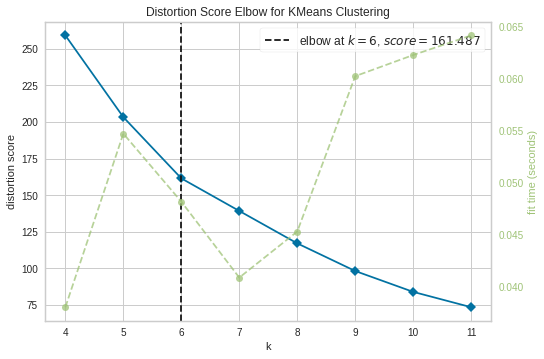

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [13]:
elbow = np.array(elbow)
# plt.plot(clusters_values,elbow[:,0])

# display(kmeans_vec)
model = KMeans()
visualizer = KElbowVisualizer(model, k=(4,12))

act = 8
x = data.loc[data['Act_Label'] == act,['Acc_X','Acc_Y']].to_numpy()
# print(x)
visualizer.fit(x)        # Fit the data to the visualizer
visualizer.show()


### 3.7.

<p> O k-means é um algoritmo que, quando utilizado para detetar outliers, separa-os devido às suas coordenadas. Ou seja, um ponto tem de estar afastado dos restantes pontos. Ao contrário deste algoritmo, o z-score avalia os outliers pela sua distância ao centro. Pode acontecer um ponto ter uma coordenada muito mais alta que as outras e é considerado outlier pelo z-score mas não pelo k-means pois pode estar próximo de outros pontos e formar um cluster.</p>

## Exercício 3.8

In [14]:
def outlier_injection(array, x, k=3, activities=[1]):
    data = array[activities].copy()
    
    for act in activities:
        [outlier_pos, non_outlier_pos] = zscore(data[act], k)
        [out_d, nps, no] = getDensity(data, act)
    
        if (out_d < x):
            mean = data[act].mean()
            std = data[act].std()
            
            z = data[act].loc[outlier_pos, ].abs().max()
            z = z - (mean + k*std)
            
            d = x - out_d
            num_points = int(np.ceil(d * data[act].count() / 100))
        
            samples = data.loc[non_outlier_pos, ].sample(num_points)
            
            for index, row in samples.iterrows():
                s = np.random.randint(2)
                if s == 0:
                    s = -1
                q = np.random.uniform(0, z)
                
                data.loc[index, act] = mean + s*k*(std + q)
        
        [outlier_pos, non_outlier_pos] = zscore(data[act], k)
        [out_d, nps, no] = getDensity(data, act)
        
    return data


# display(outliersZscore(acc, 'ACC'))
acc_injection = outlier_injection(acc, 10)
# display(outliersZscore(acc_injection, 'ACC INJ'))


# Exercício 3.9

In [15]:
def linear_regression(x, y, p):
    return np.polyfit(x, y, p)

# Exercício 3.10